# Collatz 
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 5/15/19
- @University of Tulsa
- Description: Updating Old Code with new techniques! 

In [1]:
%matplotlib notebook
#imports
from NumLib import PlotUtil # see https://github.com/Michael-Naguib/NumLib       (side note: this has A LOT of big imports... be patient)
import numpy as np
import random
import math
import sys
import tqdm

C:\Users\socce\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\socce\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#Stores the memoized values for memoized_collatz(n)
#NOTE! AS these values are saved between runs... if there is an error in the functions
#      which place values in these... it may cause an improper value to be stored...
collatz_cache={}
collatz_sequences_cache={1:[1]}
collatz_sequence_length_cache={1:1,0:0}

In [3]:
#Collatz function:
def collatz(n):
    r=n/2# more efficient than % edge case 0
    if r==n//2:
        return r
    else:
        return 3*n + 1

#Memoizes Collatz values computation:
def memoized_collatz(n):
    if n in collatz_cache:
        return collatz_cache[n]
    else:
        result = collatz(n)
        collatz_cache[n]=result
        return result

In [4]:
#WARNING! although these memoized versions have a benifit by not having to do as many computations
#         if the path length is unique and exceeds python's max recursive depth they will error...

#The Collatz sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def collatz_sequence(n):
    all_nums = [n]   
    while(num != 1):
        num = memoized_collatz(num)
        all_nums.append(num)
    return all_nums

#Memoizes Sequences .... sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def memoized_collatz_sequence(n):
    if n in collatz_sequences_cache:
        return collatz_sequences_cache[n]
    else:
        all_nums=[n]
        all_nums = all_nums + memoized_collatz_sequence(memoized_collatz(n))
        return all_nums
    
#Memoizes the sequence Length ... more memory efficient.... 
def memoized_collatz_sequence_length(n):
    if n in collatz_sequence_length_cache:
        return collatz_sequence_length_cache[n]
    else:
        result = 1+ memoized_collatz_sequence_length(memoized_collatz(n))
        collatz_sequence_length_cache[n] = result
        return result

In [5]:
#Settings
NUM_OF_POINTS=int(math.pow(10,5))

#Create the x axis values
x = np.array(list(range(NUM_OF_POINTS)))

#What this does: maps a range same as the x axis to its path length then converts to a numpy array... tqdm logs progress...
y = np.array(list(map(lambda x : memoized_collatz_sequence_length(x),tqdm.tqdm(range(NUM_OF_POINTS)))))



100%|██████████| 100000/100000 [00:00<00:00, 245742.10it/s]


In [6]:
memoized_collatz_sequence(9)

[9,
 28,
 14.0,
 7.0,
 22,
 11.0,
 34.0,
 17.0,
 52.0,
 26.0,
 13.0,
 40.0,
 20.0,
 10.0,
 5.0,
 16.0,
 8.0,
 4.0,
 2.0,
 1]

<IPython.core.display.Javascript object>


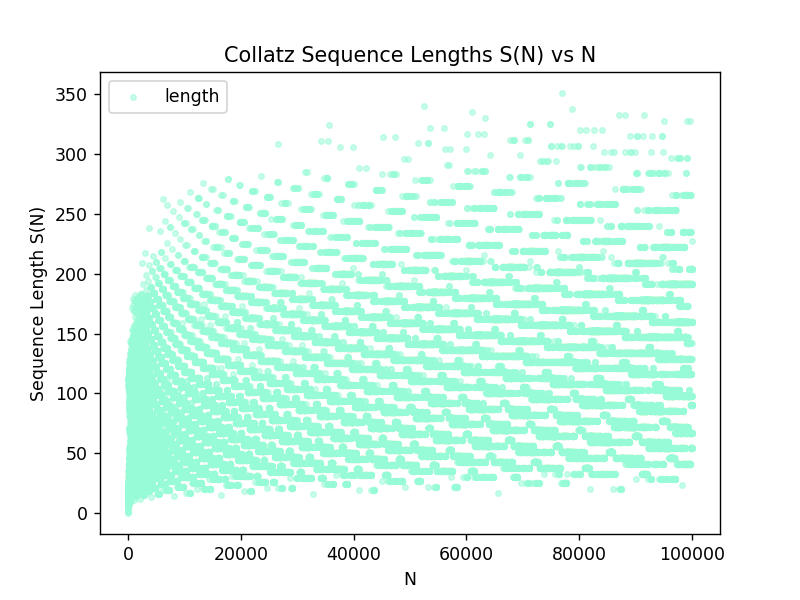

In [7]:
#Plot the data

#pu = PlotUtil.PlotUtil([x,y])
#pu.interactive_plot()
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"length"},x_name="N", y_name="Sequence Length S(N)",title="Collatz Sequence Lengths S(N) vs N")

### Collatz Tree 
> WARNING: this not even meant to be accedemic nor rigorous ... it might not even make sense at some points ... it is a quick jot down of a question i had ... rather a series of questions that i am trying to formulate... in essence this is my rough rough draft or even just intuition...

- Now i will interpret the collatz sequences as belonging to a tree
- A new memoized function will construct a tree appending each branch as a object list structure
- ``` {key: [paths which lead to that key]}```
- Note that n=log_k(d) where d is depth and n is number of nodes
- The goal is to look at the avg NodesPerLevel and then look at the distribution of levels ... to take the median of 
the depth distribution
- then compute     ``` k^n_actual = d_median  -->  k = root_n_actual(d_median)``` and compare that to k_mean and k_median... 
- The goal is to look at how different tree properties change as more nodes are added onto the tree....
- example... for x ∈ [1,n] what is k, d, d_median,k_medain etc....
- then look at x ∈ [1,n+j] where j ∈ Z+ and j!=0 (i.e j is a jump value... ) j could also be interpreted as time... as as the
tree grows considering this range.... what is j .... note technically i should just say j>n but all i really care about is that 
the next domain consideration is slightly larger...
- then after that is completed consider the path length itself as some sort of weight on a value where higher weights
have higher priority ... i am curious... put these in a queue and i think picking those items out in order then assembling that
tree structure might yeild a very interesting structure...   (note if enough time and processsing power it might be interesting to)
then grow the tree in that manner... note when i say grow the tree take 5 for example 5 goes 5 16 8 4 2 1 .... so as there
are 6 items inn its path 5 gets a weight of 6 --> say then 6 was the heighest weight .... pick from the remaining items in the
queue a number of items = to max(0,max_weight) .... and build the tree.... after growing the tree... i.e adding more values
at each time step what does the tree look like?
- IN GENERAL! --> there is a lot of potential in collatz for interpreting it as a tree structure.... 

In [50]:
#VERY basic tree class....
class TreeNode():
    def __init__(self,value):
        self.value = value
        self.children = []
    #Adds a Child to the node
    def addChild(self,otherNode):
        self.children.append(otherNode)
    #Searches Depth first for a value in a tree and if it is not found returns None
    def searchDepth(self,value):
        if self.value == value:
            return self
        else:
            loc = None
            for c in self.children:
                loc = c.searchDepth(value)
                if loc != None:
                    break
            return loc   
    #tree value structure...
    def structure(self):
        s = {self.value:[c.structure() for c in self.children]}
        return s
    def __str__(self):
        return str(self.structure())         

In [51]:
#Builds a subtree graph... sequentially....
def build_collatz_subtree(sequence):
    valueSet = set(sequence)
    root = TreeNode(sequence[len(sequence)-1])# sequence example 5 16 8 4 2 1 .... so generate backwards --> 1 first
    child = root
    for num in reversed(sequence[0:len(sequence)-1]):#cut off the last item...
        newNode= TreeNode(num)
        #print("{0} is a node of {1}".format(num,child.value))
        child.addChild(newNode)
        child=newNode
    return root 

In [64]:
#stores tree data
tree = TreeNode(1)
treeSet = set()
treeSet.add(1)

In [53]:
#Build the tree (NOTE! Relies on no duplicate calls and collatz_sequence_for(i) where i is constantally increasing)
def build_collatz_tree(add_sequence):
    #Determine if it is in the tree: what nodes do we actually need to add?
    items_not_already_in_tree=[]
    for item in add_sequence:
        if item in treeSet:
            items_not_already_in_tree.append(item)#append our root item... what will become root
            break
        else:
            treeSet.add(item)
            items_not_already_in_tree.append(item)
    if len(items_not_already_in_tree)>1: #prevents the case where the proposed root node was already in the tree
        #build subtree expects root item as last... which is what the above code does..
        #the root element is in the tree as well... 
        subtree = build_collatz_subtree(items_not_already_in_tree)
        #Find the node in the tree with the same value as the ndoe
        tree_insert_node_loc = tree.searchDepth(subtree.value)
        #Note the subtree (in collatz) each node only has one child --> add that one child ... (and thus)
        # the children of that child to the tree
        tree_insert_node_loc.addChild(subtree.children[0])
    

In [57]:
#Looks at the size of each level of the tree for computing the next path to be added to the tree 
#    NOTE! there is a lot of usefull code here that can do alot more than simply calculate levels... copy as need be...
def genLevelSizeData(tree):
    #print(str(tree))
    #Get the Levels of the tree: [[level 1],[[child 1 items],[child 2 items]],[level 3]]
    s = tree.structure()
    levels=[]
    t = [tree]
    while len(t)>0:
        currentLevel=[]
        #put all the top level nodes into the current level
        for node in t:
            currentLevel.append(node)
        #replace the current top level nodes with all the children from the previous set...
        v=[]
        for node in t:
            v = v + node.children
        levels.append(currentLevel)
        t = v
    #Convert the nodes to simply values
    levels = list(map(lambda level: list(map(lambda item: item.value,level)),levels))
    #print(str(tree)) #good test case building use  i ∈ [1,7] or [1,8] ... can verify manually....
    #print(str(levels))
    #Determine the length of the levels
    level_len = list(map(lambda level: len(level),levels))
    return level_len

In [65]:
levelData = []
#Build the tree
for i in range(1,1000):
    #print(memoized_collatz_sequence(i))
    build_collatz_tree(memoized_collatz_sequence(i))#utilizing global tree THUS RESET THE TREE BEFORE EACH RUN!
    #Generate the data
    levelData.append(genLevelSizeData(tree))#utilizing global tree which is passed here

In [68]:
#Let the data Observation and Hypothesis testing BEGIN!
i=0
for level in levelData:
    m = max(level)
    if m !=1:
        print("{0}: max={1}".format(i,m))
    i+=1

6: max=2
7: max=2
8: max=2
9: max=2
10: max=2
11: max=2
12: max=2
13: max=2
14: max=3
15: max=3
16: max=3
17: max=3
18: max=3
19: max=3
20: max=3
21: max=3
22: max=3
23: max=3
24: max=3
25: max=3
26: max=4
27: max=4
28: max=4
29: max=4
30: max=4
31: max=4
32: max=4
33: max=4
34: max=4
35: max=4
36: max=4
37: max=4
38: max=4
39: max=4
40: max=4
41: max=4
42: max=4
43: max=4
44: max=4
45: max=4
46: max=4
47: max=4
48: max=4
49: max=4
50: max=5
51: max=5
52: max=5
53: max=5
54: max=5
55: max=5
56: max=5
57: max=5
58: max=5
59: max=5
60: max=5
61: max=5
62: max=5
63: max=5
64: max=5
65: max=5
66: max=5
67: max=5
68: max=5
69: max=5
70: max=5
71: max=5
72: max=5
73: max=5
74: max=5
75: max=5
76: max=5
77: max=5
78: max=5
79: max=5
80: max=6
81: max=6
82: max=6
83: max=6
84: max=6
85: max=6
86: max=6
87: max=6
88: max=6
89: max=6
90: max=6
91: max=6
92: max=6
93: max=6
94: max=6
95: max=6
96: max=6
97: max=6
98: max=7
99: max=7
100: max=7
101: max=7
102: max=7
103: max=7
104: max=7
105: max=

714: max=25
715: max=25
716: max=26
717: max=26
718: max=26
719: max=26
720: max=26
721: max=26
722: max=26
723: max=26
724: max=26
725: max=26
726: max=26
727: max=26
728: max=27
729: max=27
730: max=27
731: max=27
732: max=27
733: max=27
734: max=27
735: max=27
736: max=27
737: max=27
738: max=27
739: max=27
740: max=27
741: max=27
742: max=27
743: max=27
744: max=27
745: max=27
746: max=27
747: max=27
748: max=27
749: max=27
750: max=27
751: max=27
752: max=27
753: max=27
754: max=27
755: max=27
756: max=27
757: max=27
758: max=27
759: max=27
760: max=27
761: max=27
762: max=27
763: max=27
764: max=27
765: max=27
766: max=27
767: max=27
768: max=27
769: max=27
770: max=28
771: max=28
772: max=28
773: max=28
774: max=28
775: max=28
776: max=29
777: max=29
778: max=29
779: max=29
780: max=29
781: max=29
782: max=29
783: max=29
784: max=29
785: max=29
786: max=29
787: max=29
788: max=29
789: max=29
790: max=29
791: max=29
792: max=29
793: max=29
794: max=29
795: max=29
796: max=29
797: